In [103]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage as ndi
%matplotlib notebook

In [104]:
# Load data
a = np.load('ptychographic_reconstruction.npy')

<IPython.core.display.Javascript object>


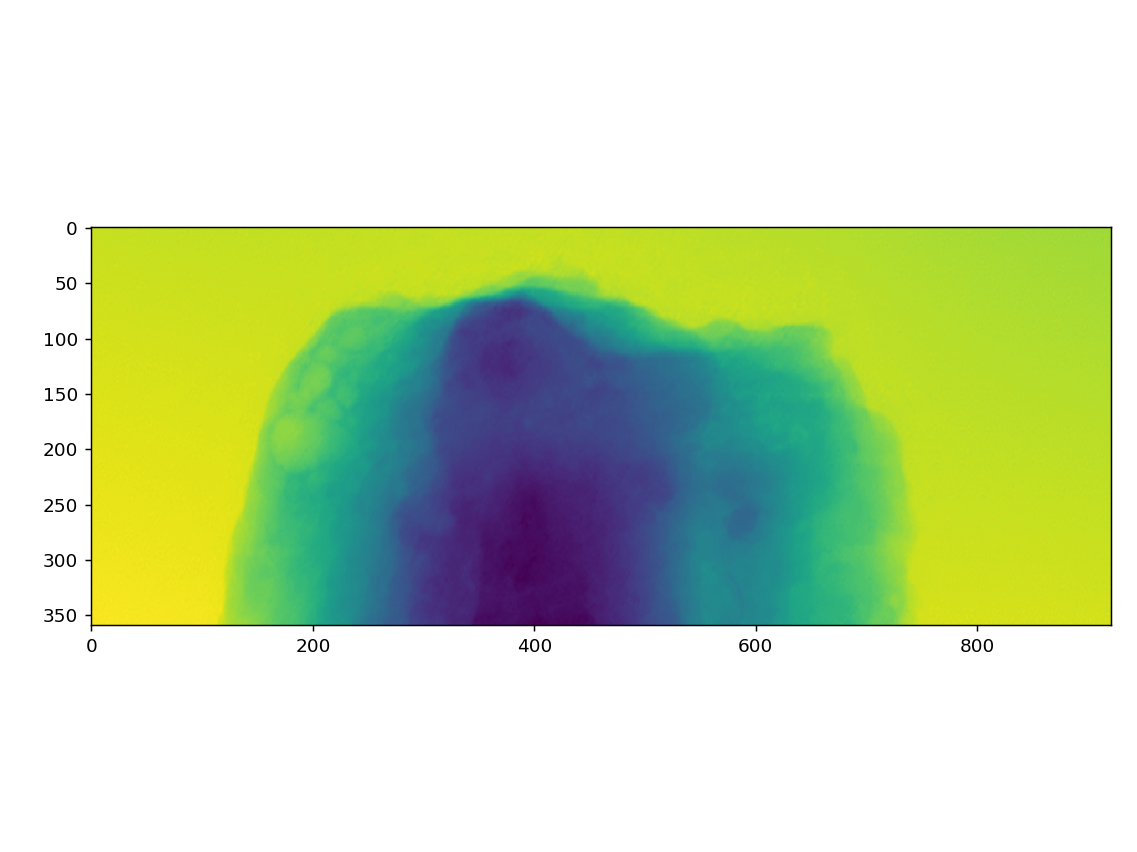

In [108]:
# Extract and unwrap the phase
ph = np.unwrap(np.angle(a))
plt.figure()
plt.imshow(ph)
plt.tight_layout()

<IPython.core.display.Javascript object>


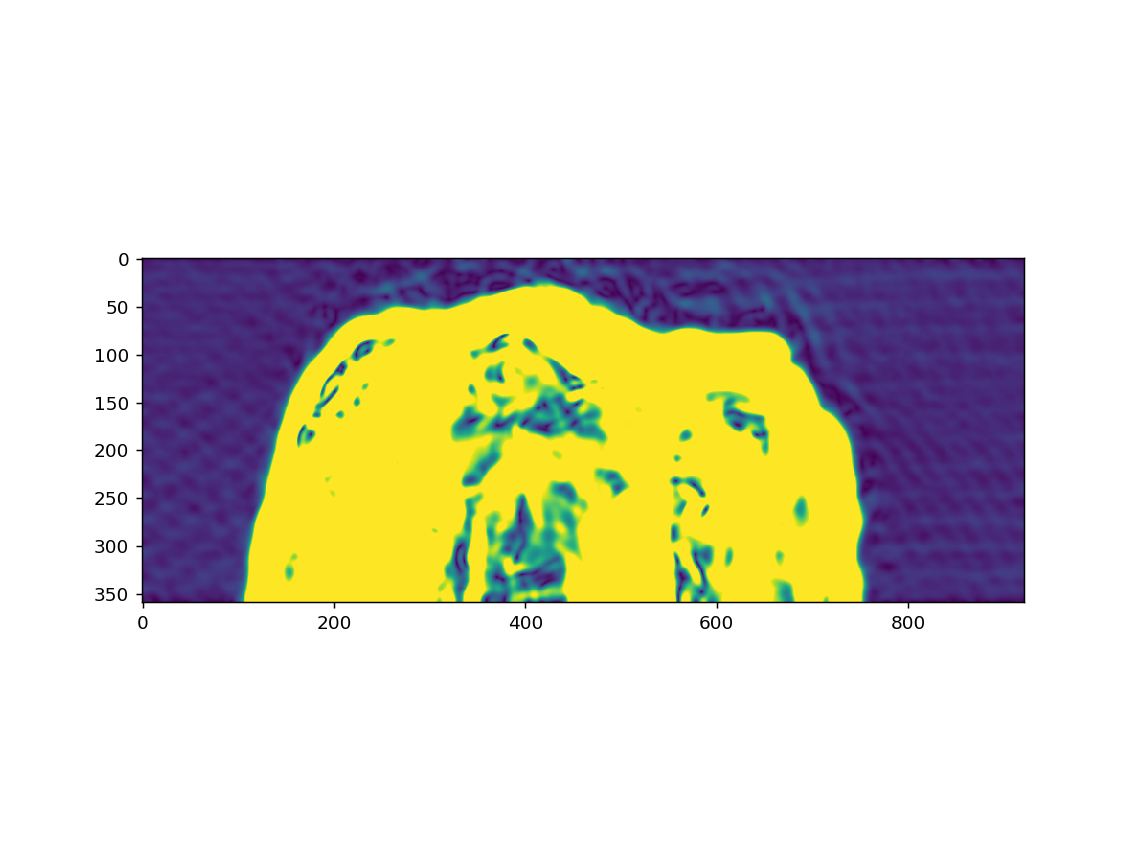

In [38]:
# Sobel filter
g0 = ndi.gaussian_filter(ph, sigma=5, order=(1,0))
g1 = ndi.gaussian_filter(ph, sigma=5, order=(0,1))
ph_sobel = np.sqrt(g0**2 + g1**2)
plt.figure()
plt.imshow(ph_sobel, vmax=.02)

<IPython.core.display.Javascript object>


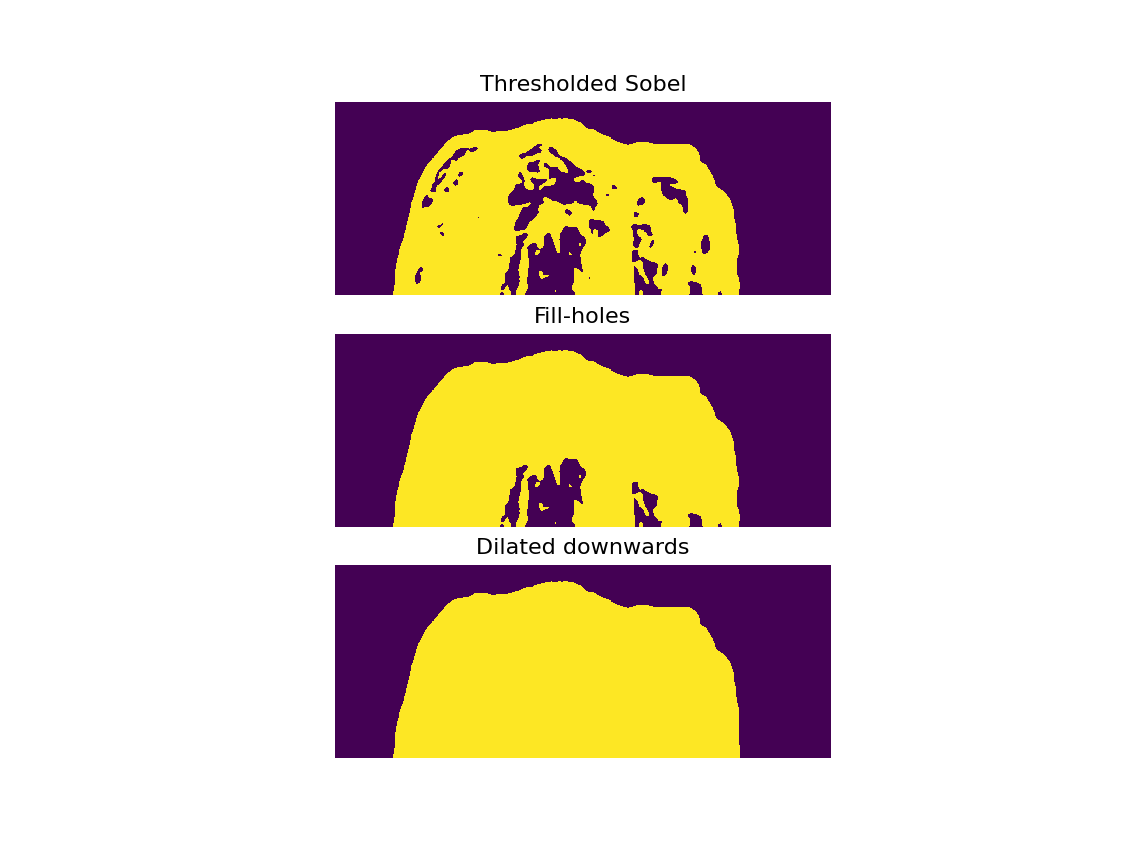

Text(0.5, 1.0, 'Dilated downwards')

In [62]:
# First threshold sobel
mask = ph_sobel>.02
# Fill holes as much as possible
mask1 = ndi.morphology.binary_fill_holes(mask)
# The holes left are thos that touch the bottom edge. Dilate downwards
strel = np.zeros((101,1))
strel[50:,0] = 1.
mask2 = ndi.morphology.binary_dilation(mask1, strel, iterations=3)

fig, (ax1,ax2,ax3) = plt.subplots(nrows=3)
ax1.imshow(mask)
ax1.axis('off')
ax1.set_title('Thresholded Sobel')
ax2.imshow(mask1)
ax2.axis('off')
ax2.set_title('Fill-holes')
ax3.imshow(mask2)
ax3.axis('off')
ax3.set_title('Dilated downwards')

In [109]:
sh = ph.shape

# Least square fit

# We want the opposite of the mask
m = ~mask2

# Generate all indices and flatten them
i0, i1 = np.indices(sh)

# Extract the pixel coordinates and values to fit
i0f = i0[m]
i1f = i1[m]
phf = ph[m]

# Model = p[0] + p[1] i0 + p[2] i1
A = np.vstack([np.ones_like(i0f), i0f, i1f]).T

# Solve lease square problem
r = np.linalg.lstsq(A, phf, rcond=None)
p = r[0]

# Generate plane
fitted_plane = p[0] + p[1]*i0 + p[2]*i1

<IPython.core.display.Javascript object>


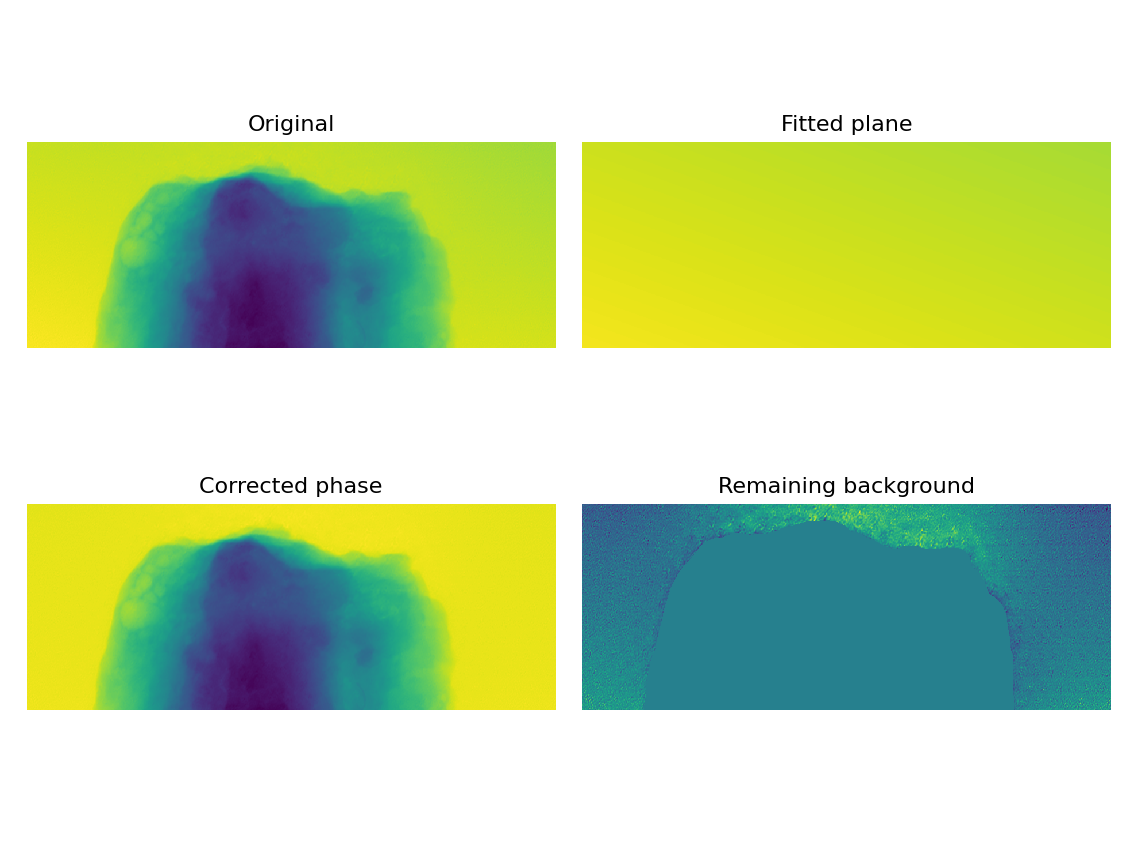

In [110]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2)
plt.set_cmap('viridis')
ax1.imshow(ph)
ax1.axis('off')
ax1.set_title('Original')
ax2.imshow(fitted_plane, vmin=ph.min(), vmax=ph.max())
ax2.axis('off')
ax2.set_title('Fitted plane')
ax3.imshow(ph-fitted_plane)
ax3.axis('off')
ax3.set_title('Corrected phase')
ax4.imshow(m*(ph-fitted_plane))
ax4.axis('off')
ax4.set_title('Remaining background')
fig.tight_layout()

In [111]:
sh = ph.shape

# Least square fit

# We want the opposite of the mask
m = ~mask2

# Generate all indices and flatten them
i0, i1 = np.indices(sh)

# Extract the pixel coordinates and values to fit
i0f = i0[m]
i1f = i1[m]
phf = ph[m]

# Model = p[0] + p[1] i0 + p[2] i1
A = np.vstack([np.ones_like(i0f), i0f, i1f, i0f**2, i1f**2, i0f*i1f]).T

# Solve lease square problem
r = np.linalg.lstsq(A, phf, rcond=None)
p = r[0]

# Generate surface
fitted_quad = p[0] + p[1]*i0 + p[2]*i1 + p[3]*i0**2 + p[4]*i1**2 + p[5]*i0*i1

<IPython.core.display.Javascript object>


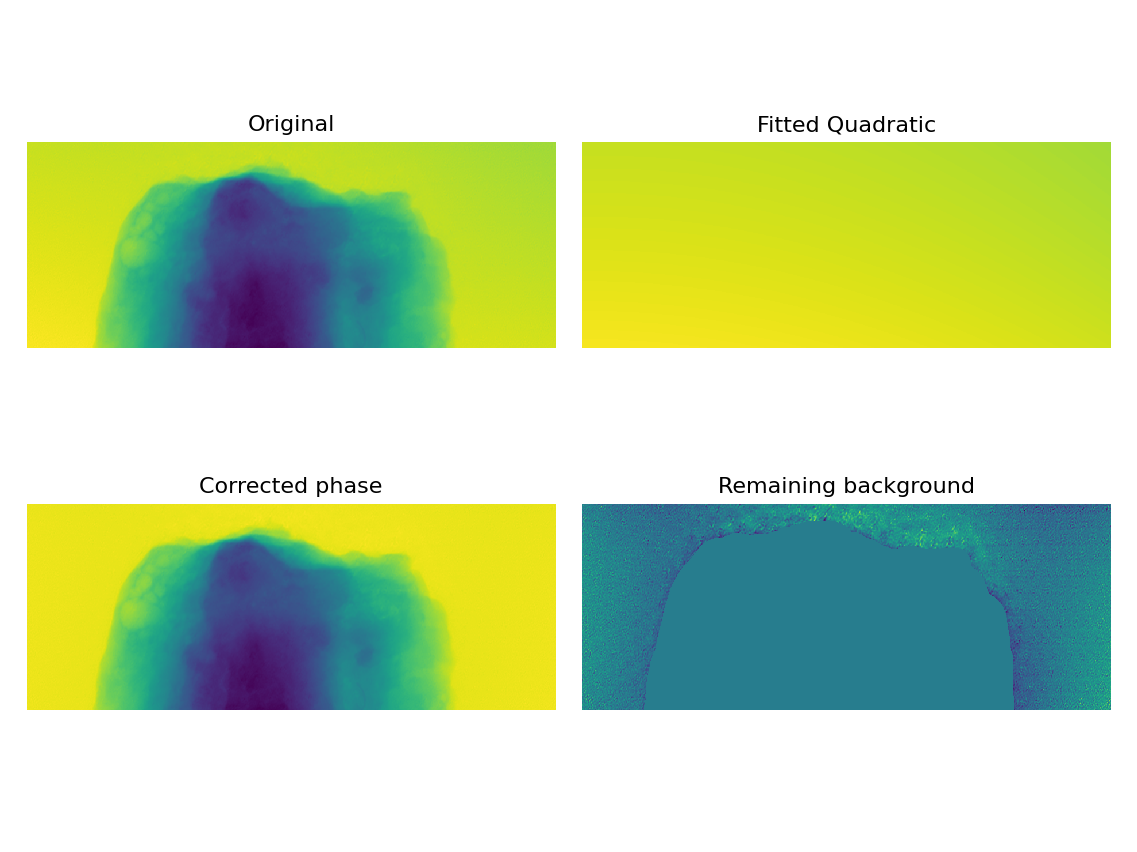

In [112]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2)
plt.set_cmap('viridis')
ax1.imshow(ph)
ax1.axis('off')
ax1.set_title('Original')
ax2.imshow(fitted_quad, vmin=ph.min(), vmax=ph.max())
ax2.axis('off')
ax2.set_title('Fitted Quadratic')
ax3.imshow(ph-fitted_quad)
ax3.axis('off')
ax3.set_title('Corrected phase')
ax4.imshow(m*(ph-fitted_quad))
ax4.axis('off')
ax4.set_title('Remaining background')
fig.tight_layout()

In [113]:
np.linalg.pinv??